In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

variables


1.   df
2.   df_cat
3.   df_num
4.   df_num_scaled    array
5.   df_scaled
6.   df_pca           array
7.   pca_df
8.   df_final_num
9.   df_final


In [ ]:
df=pd.read_csv('dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
features_num=['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']
features_cat=['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'track_genre']
df=df.drop(['Unnamed: 0'], axis=1)


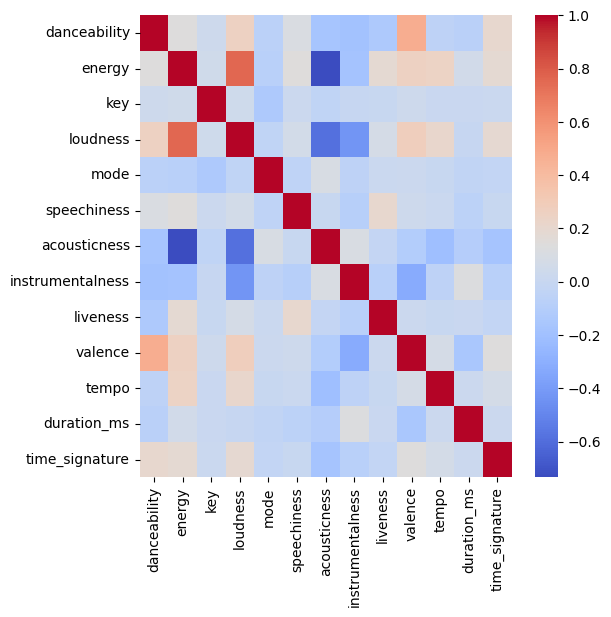

In [ ]:
df_corr=df[features_num].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(df_corr, cmap='coolwarm')
plt.show()

In [ ]:
df_cat=df[features_cat]

In [ ]:
df_num=df[features_num]
scale=StandardScaler()
df_num_scaled=scale.fit_transform(df_num)

In [ ]:
df_num_scaled

array([[ 0.62924424, -0.71714792, -1.21044237, ..., -1.14186279,
         0.02457516,  0.22182318],
       [-0.84590798, -1.88997974, -1.21044237, ..., -1.48971712,
        -0.73085898,  0.22182318],
       [-0.74218634, -1.12266943, -1.49134349, ..., -1.528312  ,
        -0.16033174,  0.22182318],
       ...,
       [ 0.35841551, -1.24194046, -1.49134349, ...,  0.34125493,
         0.40482724,  0.22182318],
       [ 0.11639835, -0.53824138,  0.47496438, ...,  0.4607423 ,
         0.52064569,  0.22182318],
       [-0.23510276, -0.6137797 , -1.21044237, ..., -1.43270877,
         0.12858529,  0.22182318]])

In [ ]:
df_scaled=pd.DataFrame(df_num_scaled, columns=df_num.columns)

In [ ]:
df_scaled

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.629244,-0.717148,-1.210442,0.300828,-1.326281,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863,0.024575,0.221823
1,-0.845908,-1.889980,-1.210442,-1.784744,0.753988,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717,-0.730859,0.221823
2,-0.742186,-1.122669,-1.491343,-0.293288,0.753988,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312,-0.160332,0.221823
3,-1.733304,-2.312994,-1.491343,-2.039252,0.753988,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859,-0.243214,-2.089680
4,0.295030,-0.788711,-0.929541,-0.282750,0.753988,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348,-0.271919,0.221823
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,-2.274962,-1.615656,-0.086838,-1.617326,0.753988,-0.401507,0.977652,2.493755,-0.668426,-1.697787,0.128333,1.462944,2.533326
113996,-2.263437,-2.084789,-1.491343,-2.000082,-1.326281,-0.421369,2.042245,2.648817,-0.570200,-1.693545,-1.231195,1.462953,0.221823
113997,0.358416,-1.241940,-1.491343,-0.524135,-1.326281,-0.403399,1.660315,-0.504112,-0.681033,1.037306,0.341255,0.404827,0.221823
113998,0.116398,-0.538241,0.474964,-0.522942,0.753988,-0.519731,0.198754,-0.504112,0.296502,-0.235548,0.460742,0.520646,0.221823


In [ ]:
n=10
pca=PCA(n_components=n)
df_pca=pca.fit_transform(df_scaled)
df_pca

array([[ 0.69092204,  0.88337229,  0.38597864, ..., -0.25333883,
        -1.00335946,  0.26481293],
       [-3.30693546,  1.46609375,  0.44665613, ..., -0.9154423 ,
        -0.33801973, -1.05714819],
       [-1.43096474, -0.01387148,  0.06663112, ..., -1.14186889,
         0.13195553, -1.27904119],
       ...,
       [-1.04706817,  1.48058483, -0.71385689, ...,  0.78167893,
        -2.22426027, -0.05027432],
       [-0.4421711 ,  0.04977214, -0.08385684, ...,  0.31897731,
        -0.27638608, -0.0642129 ],
       [-0.89328048,  1.30712583, -0.39365116, ..., -0.25991583,
        -1.39539735, -0.34213959]])

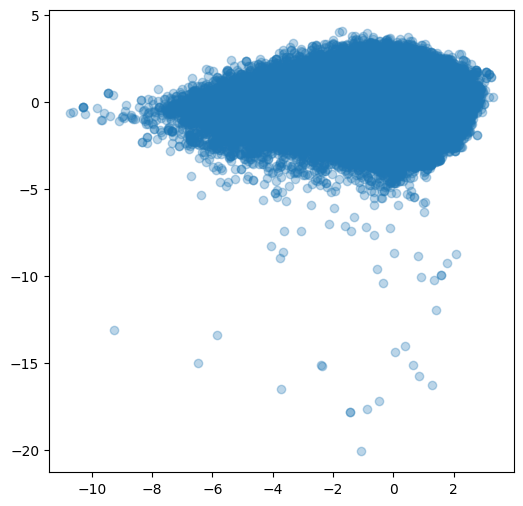

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.3)

In [ ]:
pca_df = pd.DataFrame(
   df_pca,
    columns=[f"pc_{i+1}" for i in range (n)],
)


In [ ]:
pca_df

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10
0,0.690922,0.883372,0.385979,-0.681354,-1.381544,-0.433577,-1.237999,-0.253339,-1.003359,0.264813
1,-3.306935,1.466094,0.446656,0.941381,-0.665772,-0.086192,-0.129285,-0.915442,-0.338020,-1.057148
2,-1.430965,-0.013871,0.066631,1.325718,-1.045598,-0.770440,-0.711613,-1.141869,0.131956,-1.279041
3,-3.854215,-0.309656,1.058302,2.044092,1.724328,1.042854,-0.517323,1.369507,-1.302646,-0.649331
4,-1.001044,0.441982,-0.249263,1.164144,-0.313189,0.194213,-0.201669,-0.290666,-0.008375,-1.017286
...,...,...,...,...,...,...,...,...,...,...
113995,-3.407151,-2.050998,-1.445769,0.505570,-1.590809,1.702001,2.040560,-1.011912,0.110444,-0.426120
113996,-4.979777,-1.680768,-0.912581,-0.430042,-1.734533,0.520712,-0.716789,-0.406004,-1.064495,-0.019751
113997,-1.047068,1.480585,-0.713857,0.200515,-0.458571,0.641682,-0.724755,0.781679,-2.224260,-0.050274
113998,-0.442171,0.049772,-0.083857,0.431646,0.155936,-0.146364,1.216741,0.318977,-0.276386,-0.064213


In [ ]:
df_final_num=pd.concat([ df_num,pca_df], axis=1)

In [ ]:
df_final_num

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10
0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,230666,4,0.690922,0.883372,0.385979,-0.681354,-1.381544,-0.433577,-1.237999,-0.253339,-1.003359,0.264813
1,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,149610,4,-3.306935,1.466094,0.446656,0.941381,-0.665772,-0.086192,-0.129285,-0.915442,-0.338020,-1.057148
2,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,210826,4,-1.430965,-0.013871,0.066631,1.325718,-1.045598,-0.770440,-0.711613,-1.141869,0.131956,-1.279041
3,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,201933,3,-3.854215,-0.309656,1.058302,2.044092,1.724328,1.042854,-0.517323,1.369507,-1.302646,-0.649331
4,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,198853,4,-1.001044,0.441982,-0.249263,1.164144,-0.313189,0.194213,-0.201669,-0.290666,-0.008375,-1.017286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,384999,5,-3.407151,-2.050998,-1.445769,0.505570,-1.590809,1.702001,2.040560,-1.011912,0.110444,-0.426120
113996,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,385000,4,-4.979777,-1.680768,-0.912581,-0.430042,-1.734533,0.520712,-0.716789,-0.406004,-1.064495,-0.019751
113997,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,271466,4,-1.047068,1.480585,-0.713857,0.200515,-0.458571,0.641682,-0.724755,0.781679,-2.224260,-0.050274
113998,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,283893,4,-0.442171,0.049772,-0.083857,0.431646,0.155936,-0.146364,1.216741,0.318977,-0.276386,-0.064213


In [ ]:
df_final=pd.concat([df_final_num, df_cat], axis=1)
df_final.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,track_id,artists,album_name,track_name,explicit,track_genre
0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,230666,4,0.690922,0.883372,0.385979,-0.681354,-1.381544,-0.433577,-1.237999,-0.253339,-1.003359,0.264813,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,False,acoustic
1,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,149610,4,-3.306935,1.466094,0.446656,0.941381,-0.665772,-0.086192,-0.129285,-0.915442,-0.338020,-1.057148,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,False,acoustic
2,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,210826,4,-1.430965,-0.013871,0.066631,1.325718,-1.045598,-0.770440,-0.711613,-1.141869,0.131956,-1.279041,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,False,acoustic
3,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,201933,3,-3.854215,-0.309656,1.058302,2.044092,1.724328,1.042854,-0.517323,1.369507,-1.302646,-0.649331,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,False,acoustic
4,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,198853,4,-1.001044,0.441982,-0.249263,1.164144,-0.313189,0.194213,-0.201669,-0.290666,-0.008375,-1.017286,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,False,acoustic
5,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,214240,4,0.066274,1.373801,-0.013267,0.118564,-0.416253,-0.510112,0.445398,0.088895,0.462535,-0.100973,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,False,acoustic
6,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,229400,3,-2.756104,-0.113530,0.657666,1.522437,1.258204,-0.334320,-0.683221,1.023654,-0.573564,-1.139655,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,False,acoustic
7,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,242946,4,-0.039652,1.292333,-0.801212,-0.080472,1.116434,0.233150,1.719421,0.960622,0.069869,-0.002115,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,False,acoustic
8,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,189613,4,-0.112113,1.143239,-0.150759,1.631157,-0.350219,0.343088,-0.345673,0.144702,-0.464050,0.123265,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,False,acoustic
9,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,205594,4,-0.799085,0.010011,-0.069520,1.357411,-0.697823,-0.927546,-0.605044,-1.148401,0.184398,-1.168923,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,False,acoustic
